In [30]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
#data = pd.read_csv('../data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
data = pd.read_csv('https://data.cdc.gov/resource/9mfq-cb36.csv')
data['submission_date'] = pd.to_datetime(data['submission_date'])

# Get data from the cases CSV

# Display the range of the data set

# Get distinct states

# Get total cases

# Get total number of deaths

# Get day with highest new cases

# Get state with highest average new cases

# Get state with highest average deaths

# Plot covid cases over time in the US

# Plot covid death over time in the US


In [31]:

# Display the range of the data set by date
sorted_dates = data.sort_values(by="submission_date")
print("First Date: " + sorted_dates['submission_date'].head(1).to_string(header=None, index=None))
print("Final Date: " + sorted_dates['submission_date'].tail(1).to_string(header=None, index=None) )

First Date: 2020-01-22
Final Date: 2021-06-15


In [32]:
# Display the range of the data set by number
biggest = data["tot_cases"].max()
biggest
smallest = data["tot_cases"].min()
print("The range of total cases is from ", smallest, " to ", biggest)

The range of total cases is from  0  to  2932769


In [33]:
#Unique States
states = data['state'].unique()
print(states)

['KS' 'MP' 'RMI' 'NY' 'PW' 'AS' 'FL' 'OH' 'PR' 'NYC' 'GA' 'AK' 'TN' 'WV'
 'UT' 'IA' 'SD' 'MA' 'TX' 'CO' 'OK' 'HI' 'PA' 'NM' 'AR']


In [34]:
#Total Cases
total = data["new_case"].sum()
print("Total Cases: " + f'{total:,}')

Total Cases: 1,215,530.0


In [35]:
#Total Deaths
deaths = data["new_death"].sum()
print("Total Cases: " + f'{deaths:,}')

Total Cases: 21,427.0


In [36]:
#Date with the highest new cases
highest = data["new_case"].max()
highestnewcases = data.loc[data.new_case == highest]
highestnewcases["submission_date"]

840   2021-01-30
Name: submission_date, dtype: datetime64[ns]

In [37]:
#State with the highest average new cases
highest_average_state = ""
highaverage = 0

for state in data["state"].unique():
    average = data.loc[data["state"] == state]["new_case"].sum() / len(data.loc[data["state"] == state]["new_case"])
    if(average > highaverage):
        highaverage = average
        highest_average_state = state

print(highest_average_state)
print("Total Cases: " + f'{highaverage:,}')

TX
Total Cases: 7,067.428571428572


In [38]:
#State with the highest average new deaths
highest_average_state = ""
highaverage = 0

for state in data["state"].unique():
    average = data.loc[data["state"] == state]["new_death"].sum() / len(data.loc[data["state"] == state]["new_death"])
    if(average > highaverage):
        highaverage = average
        highest_average_state = state

print(highest_average_state)
print(highaverage)

TX
108.21428571428571


In [39]:
data.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2021-03-11,KS,297229,241035.0,56194.0,0.0,0.0,4851,NaN,NaN,0.0,0.0,2021-03-12T15:20:13.190,Agree,NaN
1,2020-07-28,MP,40,40.0,0.0,0.0,0.0,2,2.0,0.0,0.0,0.0,2020-07-29T14:34:46.946,Agree,Agree
2,2020-05-17,RMI,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2020-05-18T16:01:54.000,Agree,Agree
3,2020-07-27,NY,188293,NaN,NaN,318.0,0.0,8822,NaN,NaN,2.0,0.0,2020-07-28T14:21:07.479,Not agree,Not agree
4,2021-05-09,PW,0,NaN,NaN,0.0,0.0,0,NaN,NaN,0.0,0.0,2021-05-10T14:15:36.155,NaN,NaN


In [40]:
# Plot covid cases over time in the US
unique_days = data["submission_date"].unique()
unique_days_total_cases = []
for date in unique_days:
    total_day = data.loc[data["submission_date"] == date]
    avgsum = total_day['tot_cases'].sum()
    unique_days_total_cases.append(avgsum)

dataset = {
    'submission_date': pd.to_datetime(unique_days),
    'tot_cases': unique_days_total_cases}
df = pd.DataFrame(dataset)
sorted_cases_over_time = df.sort_values(by="submission_date")

fig = px.line(sorted_cases_over_time, x = 'submission_date', y = 'tot_cases', title='Covid Cases Over Time')
fig.show()

In [41]:
# Plot covid deaths over time in the US
unique_days = data["submission_date"].unique()
unique_days_total_cases = []
for date in unique_days:
    total_day = data.loc[data["submission_date"] == date]
    avgsum = total_day['tot_death'].sum()
    unique_days_total_cases.append(avgsum)

dataset = {
    'submission_date': pd.to_datetime(unique_days),
    'tot_death': unique_days_total_cases}
df = pd.DataFrame(dataset)
sorted_cases_over_time = df.sort_values(by="submission_date")

fig = px.line(sorted_cases_over_time, x = 'submission_date', y = 'tot_death', title='Covid Deaths Over Time')
fig.show()

          Cases  Deaths
state                  
AK       6014.0    22.0
AR      29464.0   381.0
AS          0.0     0.0
CO      34835.0   438.0
FL     128600.0  2382.0
GA      95048.0  2414.0
HI       2405.0    16.0
IA      37405.0   549.0
KS      44711.0   612.0
MA      37817.0  1579.0
MP         11.0     0.0
NM      14968.0   340.0
NY      73943.0  1791.0
NYC     62271.0  1822.0
OH      81360.0  1170.0
OK      39146.0   757.0
PA      95894.0  1143.0
PR      16035.0   198.0
PW          0.0     0.0
RMI         0.0     0.0
SD      14517.0   260.0
TN      38732.0   612.0
TX     292287.0  4545.0
UT      37329.0   205.0
WV      11311.0   191.0


<ipython-input-80-7d44a5c63a4b>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='state'>

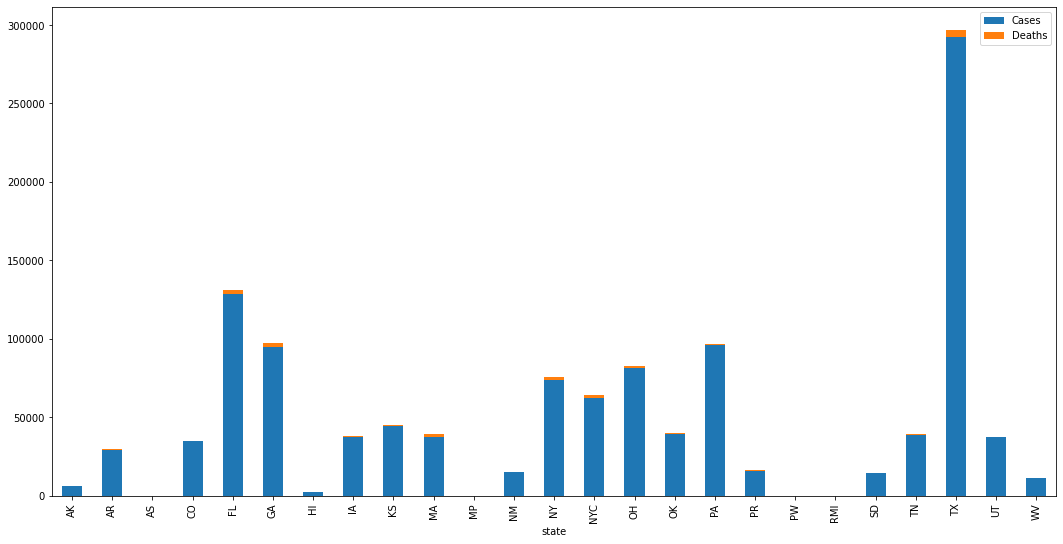

In [80]:
#stacked bar graph showing total cases and deaths per state (help see how many deaths there are compared to the total number of cases)
dataCondensed = data[['state', 'new_case', 'new_death']]
groupedByState = dataCondensed.groupby(['state'])['new_case', 'new_death'].sum()
groupedByState['Cases'] = groupedByState['new_case'] - groupedByState['new_death']
groupedByState['Deaths'] = groupedByState['new_death']
newCasesDropped = groupedByState[['Cases', 'Deaths']]
print(newCasesDropped)
newCasesDropped.plot.bar(figsize=(18,9), stacked=True)


